In [28]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [29]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [30]:
y.shape, tx.shape

((10000,), (10000, 2))

### NB: throughout this laboratory the data has the following format: 
  * there are **N = 10000** data entries
  * **y** represents the column vector containing weight information -- that which we wish to predict/the output (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,)**.
  * **tx** represents the matrix $\tilde{X}$ formed by laterally concatenating a column vector of 1s to the column vector of height information -- the input data (see also the first page of $\texttt{exercise02.pdf}$). Its **shape** is **(N,2)**.

# 1. Computing the Cost Function
Fill in the `compute_loss` function below:

In [31]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    N = len(y)
    loss = (1/2*N)*np.sum((y-tx@w)**2)
    # ***************************************************
    return loss

# 2. Grid Search

Fill in the function `grid_search()` below:

In [32]:
#from costs import *


def grid_search(y, tx, grid_w0, grid_w1):
    """Algorithm for grid search.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        grid_w0: numpy array of shape=(num_grid_pts_w0, ). A 1D array containing num_grid_pts_w0 values of parameter w0 to be tested in the grid search.
        grid_w1: numpy array of shape=(num_grid_pts_w1, ). A 1D array containing num_grid_pts_w1 values of parameter w1 to be tested in the grid search.

    Returns:
        losses: numpy array of shape=(num_grid_pts_w0, num_grid_pts_w1). A 2D array containing the loss value for each combination of w0 and w1
    """

    losses = np.zeros((len(grid_w0), len(grid_w1)))
    # ***************************************************
    for i, w0 in enumerate(grid_w0):
        for j, w1 in enumerate(grid_w1):
            w = np.array([w0, w1])
            losses[i, j]= compute_loss(y, tx, w)
    # ***************************************************
    
    return losses

Let us play with the grid search demo now!

Grid Search: loss*=4242448314.6782475, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.003 seconds


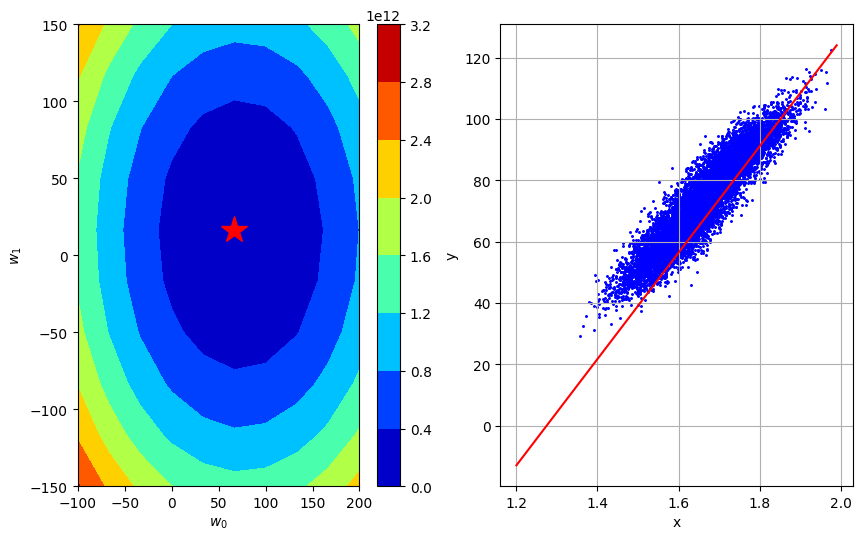

In [33]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print(
    "Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
        l=loss_star, w0=w0_star, w1=w1_star, t=execution_time
    )
)

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0, 6.0)
fig.savefig("grid_plot")  # Optional saving

# 3. Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [34]:
def compute_gradient(y, tx, w):
    """Computes the gradient at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        An numpy array of shape (2, ) (same shape as w), containing the gradient of the loss at w.
    """
    # ***************************************************
    N = len(y)
    grad = -1/N * tx.T @ (y - tx@w)
    # ***************************************************
    return grad

Please fill in the functions `gradient_descent` below:

In [35]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """The Gradient Descent (GD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of GD
        ws: a list of length max_iters + 1 containing the model parameters as numpy arrays of shape (2, ),
            for each iteration of GD (as well as the final weights)
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        grad = compute_gradient(y, tx, w)   
        loss = compute_loss(y, tx, w)
        # ***************************************************

        # ***************************************************
        w = w - gamma * grad
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print(
            "GD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [36]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()
gd_losses, gd_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

GD iter. 0/49: loss=279223671275.91675, w0=14.658784400421059, w1=2.6959424869977866
GD iter. 1/49: loss=179257041579.86447, w0=26.385811920757867, w1=4.852696476596016
GD iter. 2/49: loss=115278398574.3912, w0=35.767433937027334, w1=6.578099668274616
GD iter. 3/49: loss=74332067050.88821, w0=43.27273155004292, w1=7.958422221617489
GD iter. 4/49: loss=48126414875.84629, w0=49.27696964045538, w1=9.062680264291792
GD iter. 5/49: loss=31354797483.81948, w0=54.08036011278534, w1=9.94608669843124
GD iter. 6/49: loss=20620962352.92232, w0=57.923072490649304, w1=10.652811845742796
GD iter. 7/49: loss=13751307869.148157, w0=60.997242392940485, w1=11.218191963592037
GD iter. 8/49: loss=9354728999.532677, w0=63.456578314773424, w1=11.67049605787144
GD iter. 9/49: loss=6540918522.978773, w0=65.42404705223977, w1=12.032339333294956
GD iter. 10/49: loss=4740079817.984278, w0=66.99802204221285, w1=12.321813953633773
GD iter. 11/49: loss=3587543046.787798, w0=68.25720203419132, w1=12.553393649904827


interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

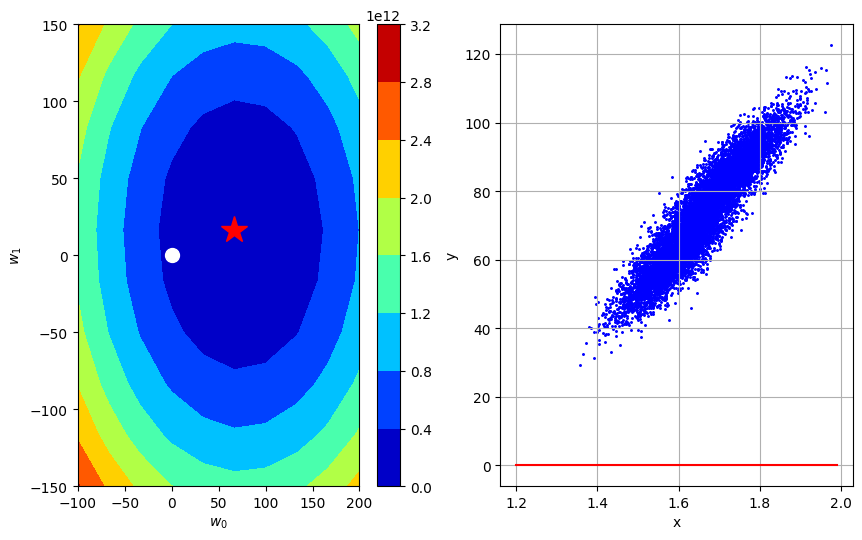

In [37]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gd_losses,
        gd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 4. Stochastic gradient descent

In [38]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the stochastic gradient of the loss at w.
    """

    # ***************************************************
    N = len(y)
    stoch_grad = -1/N * tx.T @ (y - tx@w)
    # ***************************************************
    return stoch_grad


def stochastic_gradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """The Stochastic Gradient Descent algorithm (SGD).

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic gradient
        max_iters: a scalar denoting the total number of iterations of SGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            stoch_grad = compute_stoch_gradient(minibatch_y, minibatch_tx, w) 
            loss = compute_loss(minibatch_y, minibatch_tx, w)

        w = w - gamma*stoch_grad

        # store w and loss
        ws.append(w)
        losses.append(loss)
        # ***************************************************
        

        print(
            "SGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [39]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=3223.659944409663, w0=8.029520464398436, w1=-1.976385565698471
SGD iter. 1/49: loss=2619.350780203886, w0=15.267407974167963, w1=-0.49377567005610556
SGD iter. 2/49: loss=1084.6603242109773, w0=19.925004616667135, w1=-7.285370877054056
SGD iter. 3/49: loss=182.98675277689574, w0=21.838048018040432, w1=-10.210930251163338
SGD iter. 4/49: loss=2742.6838788789414, w0=29.244374879419077, w1=-5.342188458255707
SGD iter. 5/49: loss=2417.1752658749115, w0=36.197324276437456, w1=4.491982683847052
SGD iter. 6/49: loss=666.6370223085969, w0=39.84872680781796, w1=4.063655845692253
SGD iter. 7/49: loss=178.24467900904008, w0=41.73681938504525, w1=1.294466315550546
SGD iter. 8/49: loss=111.00086313012584, w0=43.226791620559226, w1=-0.3354095494084617
SGD iter. 9/49: loss=263.2557344166283, w0=45.521375392909356, w1=-0.8287928079180489
SGD iter. 10/49: loss=135.92259936817257, w0=47.17014826609822, w1=-1.5193055902705441
SGD iter. 11/49: loss=257.3056238465659, w0=49.43865272431

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

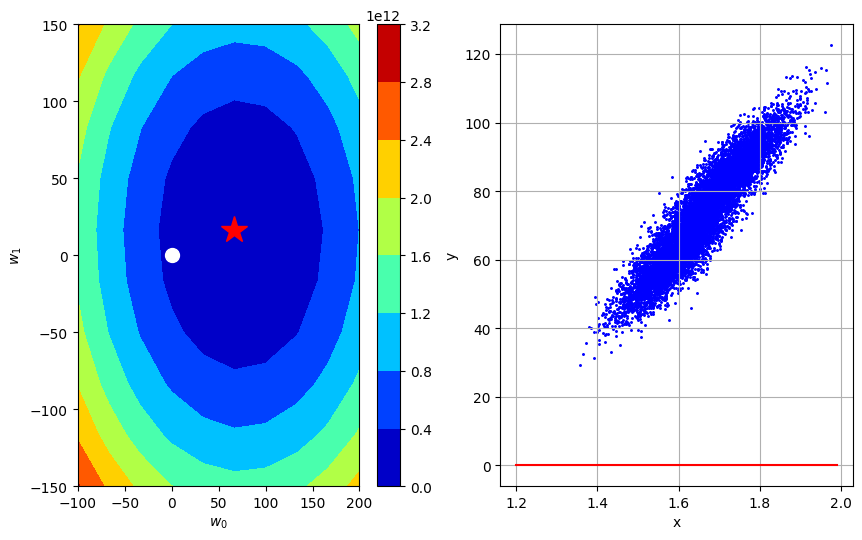

In [40]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses,
        sgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(sgd_ws)))

# 5. Effect of Outliers and MAE Cost Function

In [41]:
import datetime
from helpers import *

# ***************************************************
sub_height, sub_weight, sub_gender = load_data(sub_sample=True, add_outlier=False)
sub_out_height, sub_out_weight, sub_out_gender = load_data(sub_sample=True, add_outlier=True)
# ***************************************************

x_sub, mean_x_sub, std_x_sub = standardize(sub_height)
y_sub, tx_sub = build_model_data(x_sub, sub_weight)

x_sub_out, mean_x_sub_out, std_x_sub_out = standardize(sub_out_height)
y_sub_out, tx_sub_out = build_model_data(x_sub_out, sub_out_weight)

In [42]:
y_sub.shape, tx_sub.shape

((200,), (200, 2))

In [43]:
y_sub_out.shape, tx_sub_out.shape

((202,), (202, 2))

In [44]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
# TODO: fit the model to the subsampled data / subsampled data with outliers and visualize the cloud of points
#       and the model fit
sgd_losses_sub, sgd_ws_sub = stochastic_gradient_descent(
    y_sub, tx_sub, w_initial, batch_size, max_iters, gamma
)
# ***************************************************


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2019.6463452544247, w0=12.71108601262512, w1=-4.279448798573166
SGD iter. 1/49: loss=1418.0727770511605, w0=23.362180893626455, w1=-6.160811334692372
SGD iter. 2/49: loss=2697.984303876128, w0=38.053632296060805, w1=1.1393165975629564
SGD iter. 3/49: loss=100.77400537855702, w0=40.89298441059056, w1=-4.446291302196165
SGD iter. 4/49: loss=333.66902331765385, w0=46.05956179464398, w1=-8.218801718173616
SGD iter. 5/49: loss=1012.5853408241273, w0=55.05994107920362, w1=-2.5627556414440047
SGD iter. 6/49: loss=76.78377834465437, w0=52.58149352729288, w1=1.8354643256932466
SGD iter. 7/49: loss=280.8892809795818, w0=57.32186719171708, w1=3.4838321179451546
SGD iter. 8/49: loss=4.722151042205524, w0=57.936498856518405, w1=3.0254414885967864
SGD iter. 9/49: loss=384.1852738551778, w0=63.48039837837251, w1=9.44047965893321
SGD iter. 10/49: loss=127.1428057395406, w0=66.66966545078323, w1=15.37683501795572
SGD iter. 11/49: loss=119.4098695090346, w0=69.76042418622713, w1=17.

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

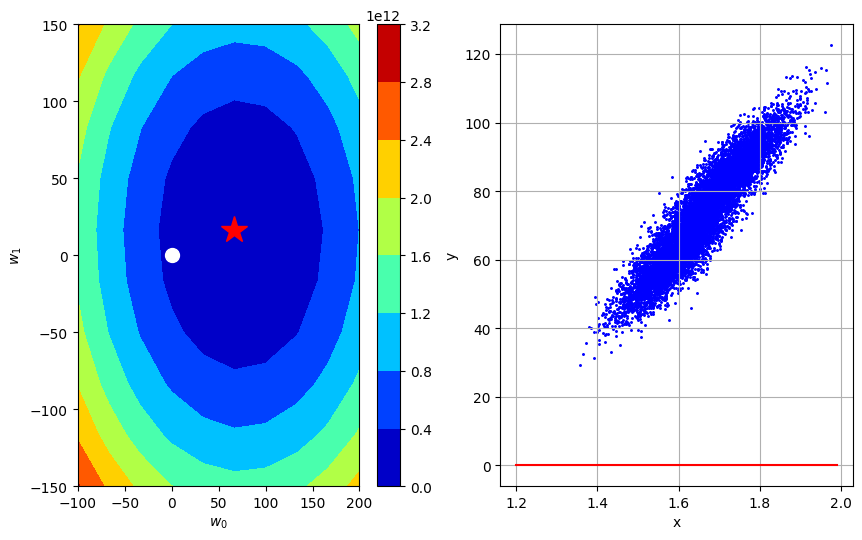

In [45]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses_sub,
        sgd_ws_sub,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

In [46]:
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.2

# Initialization
w_initial = np.array([0, 0])

# Start gradient descent.
start_time = datetime.datetime.now()

# ***************************************************
sgd_losses_sub_out, sgd_ws_sub_out = stochastic_gradient_descent(
    y_sub_out, tx_sub_out, w_initial, batch_size, max_iters, gamma
)
# ***************************************************


end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("GD: execution time={t:.3f} seconds".format(t=exection_time))

SGD iter. 0/49: loss=2153.529658477866, w0=13.125637991283675, w1=-12.876150280300061
SGD iter. 1/49: loss=1016.9313313172978, w0=22.145311294978427, w1=-19.669106410185123
SGD iter. 2/49: loss=16.38689904284888, w0=23.29027938336688, w1=-21.36613590042309
SGD iter. 3/49: loss=3232.278303594147, w0=39.3707726683234, w1=-6.866921598302337
SGD iter. 4/49: loss=194.6915385089863, w0=43.31733105262723, w1=-10.09751838031948
SGD iter. 5/49: loss=1527.5654242196683, w0=54.37197866969642, w1=1.498423902628124
SGD iter. 6/49: loss=144.44546789162956, w0=57.771337054940666, w1=-1.5082656378114372
SGD iter. 7/49: loss=322.45838025971824, w0=62.850379328910975, w1=1.2383337365434208
SGD iter. 8/49: loss=37.849719973814324, w0=64.5904878306732, w1=0.7822617909604737
SGD iter. 9/49: loss=13.317207164715208, w0=63.558317024470455, w1=0.8025442362740435
SGD iter. 10/49: loss=151.94922638979506, w0=67.04485371740567, w1=4.075817962919281
SGD iter. 11/49: loss=93.35325908820278, w0=69.7776655892798, w1

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

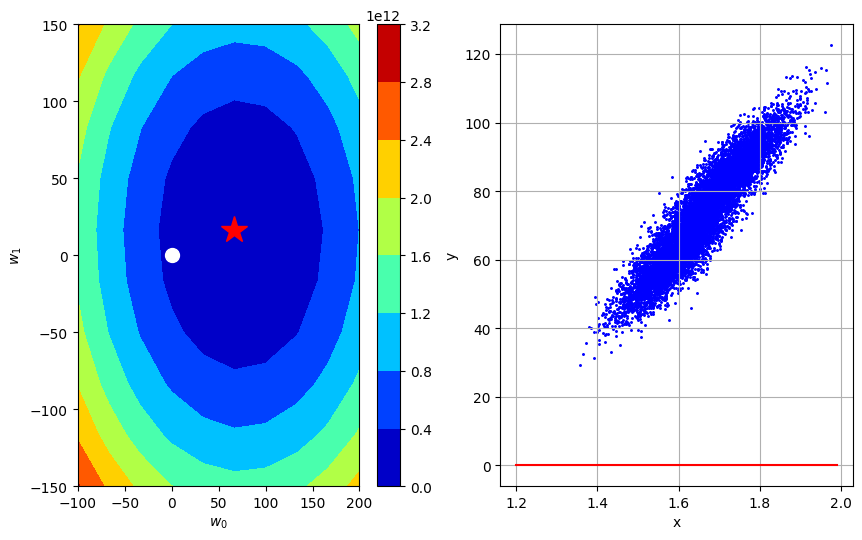

In [47]:
# Time Visualization
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses_sub_out,
        sgd_ws_sub_out,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(gd_ws)))

# 6. Subgradient descent

In [48]:
def compute_subgradient_mae(y, tx, w):
    """Compute a subgradient of the MAE at w.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2, ). The vector of model parameters.

    Returns:
        A numpy array of shape (2, ) (same shape as w), containing the subgradient of the MAE at w.
    """
    # ***************************************************
    N = len(y)
    e = y - tx @ w
    subgrad = -1/N * tx.T @ np.sign(e)
    return subgrad
    # ***************************************************

In [49]:
def compute_loss(y, tx, w):
    """Calculate the loss using either MSE or MAE.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        w: numpy array of shape=(2,). The vector of model parameters.

    Returns:
        the value of the loss (a scalar), corresponding to the input parameters w.
    """
    # ***************************************************
    N = len(y)
    loss = (1/2*N)*np.sum(np.abs(y-tx@w))
    # ***************************************************
    return loss

In [50]:
def subgradient_descent(y, tx, initial_w, max_iters, gamma):
    """The SubGradient Descent (SubGD) algorithm.

    Args:
        y: numpy array of shape=(N, )
        tx: numpy array of shape=(N,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        max_iters: a scalar denoting the total number of iterations of GD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubGD
    """
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        sub_grad = compute_subgradient_mae(y, tx, w)
        loss = compute_loss(y, tx, w)
        # ***************************************************
        # ***************************************************
        w = w - gamma * sub_grad
        # ***************************************************

        ws.append(w)
        losses.append(loss)
        print(
            "SubGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )

    return losses, ws

In [51]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subgd_losses, subgd_ws = subgradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubGD: execution time={t:.3f} seconds".format(t=exection_time))

SubGD iter. 0/499: loss=3664696100.1052585, w0=0.6999999999999457, w1=-8.207193605280771e-16
SubGD iter. 1/499: loss=3629696100.1052613, w0=1.3999999999998913, w1=-1.6414387210561541e-15
SubGD iter. 2/499: loss=3594696100.1052637, w0=2.099999999999837, w1=-2.4621580815842312e-15
SubGD iter. 3/499: loss=3559696100.1052666, w0=2.7999999999997827, w1=-3.2828774421123083e-15
SubGD iter. 4/499: loss=3524696100.1052694, w0=3.499999999999728, w1=-4.103596802640386e-15
SubGD iter. 5/499: loss=3489696100.105272, w0=4.199999999999674, w1=-4.924316163168463e-15
SubGD iter. 6/499: loss=3454696100.1052747, w0=4.89999999999962, w1=-5.745035523696541e-15
SubGD iter. 7/499: loss=3419696100.1052775, w0=5.599999999999566, w1=-6.565754884224618e-15
SubGD iter. 8/499: loss=3384696100.10528, w0=6.299999999999512, w1=-7.386474244752696e-15
SubGD iter. 9/499: loss=3349696100.105283, w0=6.999999999999458, w1=-8.207193605280773e-15
SubGD iter. 10/499: loss=3314696100.1052856, w0=7.699999999999404, w1=-9.027912

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

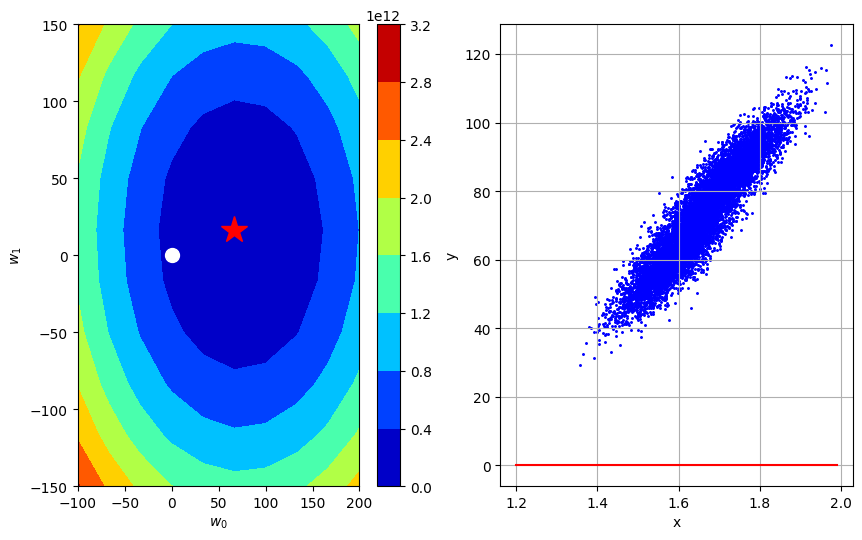

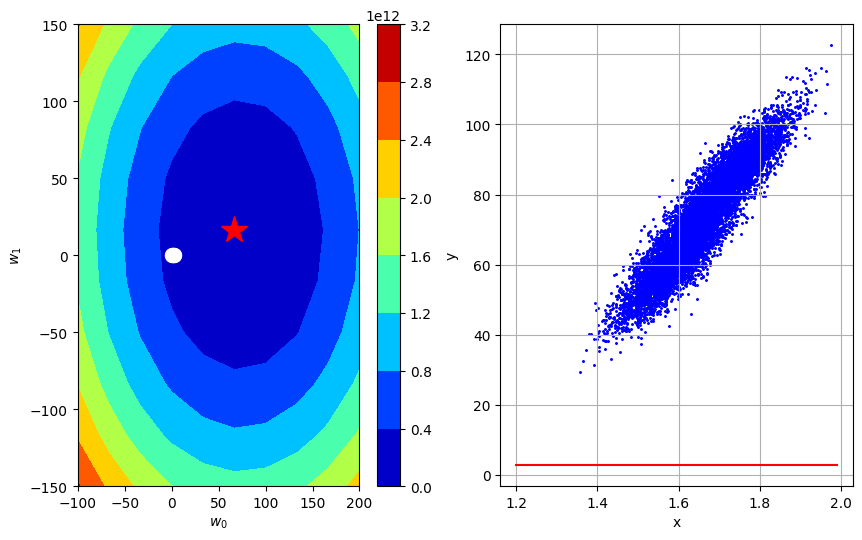

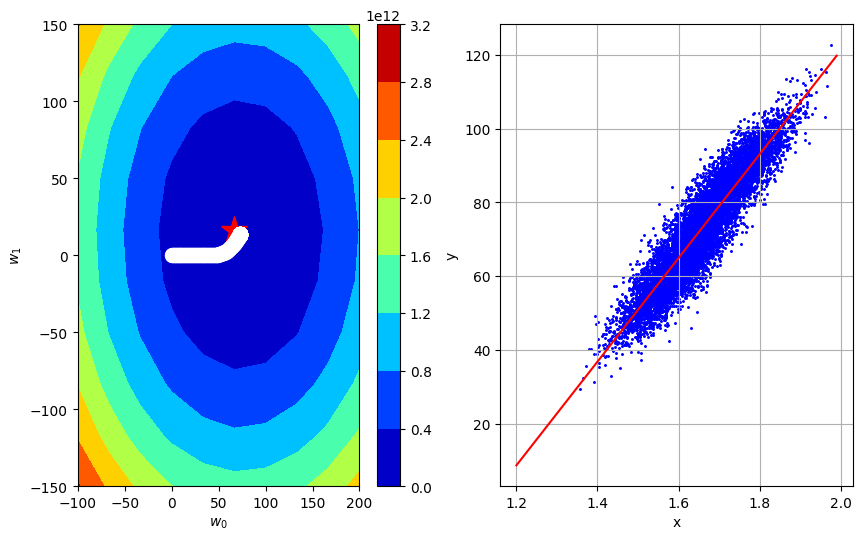

In [52]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subgd_losses,
        subgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subgd_ws)))

# Stochastic Subgradient Descent

**NB** for the computation of the subgradient you can reuse the `compute_subgradient` method that you implemented above, just making sure that you pass in a minibatch as opposed to the full data.

In [53]:
def stochastic_subgradient_descent(y, tx, initial_w, batch_size, max_iters, gamma):
    """Compute a stochastic subgradient at w from a data sample batch of size B, where B < N, and their corresponding labels.

    Args:
        y: numpy array of shape=(B, )
        tx: numpy array of shape=(B,2)
        initial_w: numpy array of shape=(2, ). The initial guess (or the initialization) for the model parameters
        batch_size: a scalar denoting the number of data points in a mini-batch used for computing the stochastic subgradient
        max_iters: a scalar denoting the total number of iterations of SubSGD
        gamma: a scalar denoting the stepsize

    Returns:
        losses: a list of length max_iters containing the loss value (scalar) for each iteration of SubSGD
        ws: a list of length max_iters containing the model parameters as numpy arrays of shape (2, ), for each iteration of SubSGD
    """

    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w

    for n_iter in range(max_iters):
        # ***************************************************
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size):
            sub_grad = compute_subgradient_mae(minibatch_y, minibatch_tx, w) 
            loss = compute_loss(minibatch_y, minibatch_tx, w)

        w = w - gamma * sub_grad
        # ***************************************************
        ws.append(w)
        losses.append(loss)
        # ***************************************************

        print(
            "SubSGD iter. {bi}/{ti}: loss={l}, w0={w0}, w1={w1}".format(
                bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]
            )
        )
    return losses, ws

In [54]:
# Define the parameters of the algorithm.
max_iters = 500
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SubSGD.
start_time = datetime.datetime.now()
subsgd_losses, subsgd_ws = stochastic_subgradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma
)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SubSGD: execution time={t:.3f} seconds".format(t=exection_time))

SubSGD iter. 0/499: loss=30.79307220185785, w0=0.7, w1=-0.4501973364335677
SubSGD iter. 1/499: loss=38.78251015847249, w0=1.4, w1=-0.39908642325437593
SubSGD iter. 2/499: loss=34.29711615339616, w0=2.0999999999999996, w1=-0.6267820631943487
SubSGD iter. 3/499: loss=35.095956369920515, w0=2.8, w1=-0.7570271726388011
SubSGD iter. 4/499: loss=37.38512214537094, w0=3.5, w1=-0.32375516944349664
SubSGD iter. 5/499: loss=24.592065929519823, w0=4.2, w1=-0.7429984808959453
SubSGD iter. 6/499: loss=30.608803980252485, w0=4.9, w1=-0.7031206749784951
SubSGD iter. 7/499: loss=35.413788956017406, w0=5.6000000000000005, w1=-0.9288525050524283
SubSGD iter. 8/499: loss=35.30363429479951, w0=6.300000000000001, w1=-1.0085691328917472
SubSGD iter. 9/499: loss=29.562116357266184, w0=7.000000000000001, w1=-1.1324070028153332
SubSGD iter. 10/499: loss=32.375009871585505, w0=7.700000000000001, w1=-1.1696380219380045
SubSGD iter. 11/499: loss=45.092686939123645, w0=8.4, w1=0.050803832795120796
SubSGD iter. 12/

interactive(children=(IntSlider(value=1, description='n_iter', max=501, min=1), Output()), _dom_classes=('widg…

<function __main__.plot_figure(n_iter)>

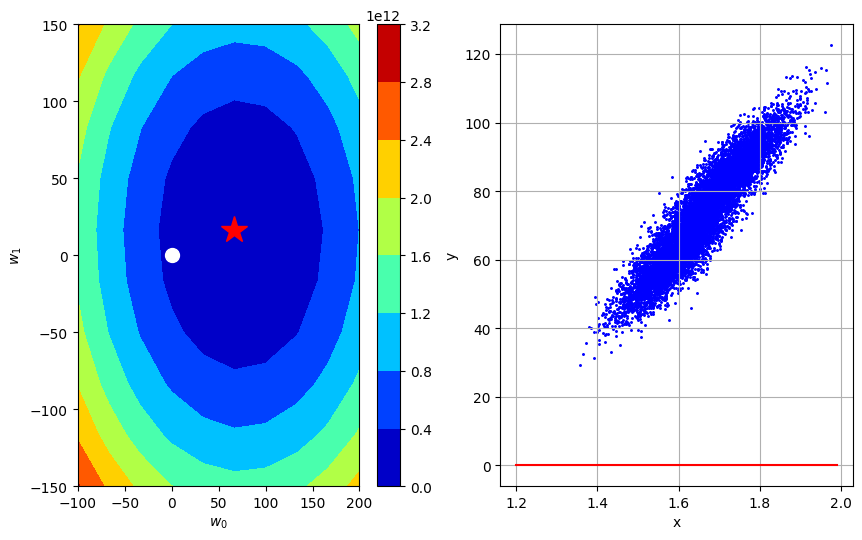

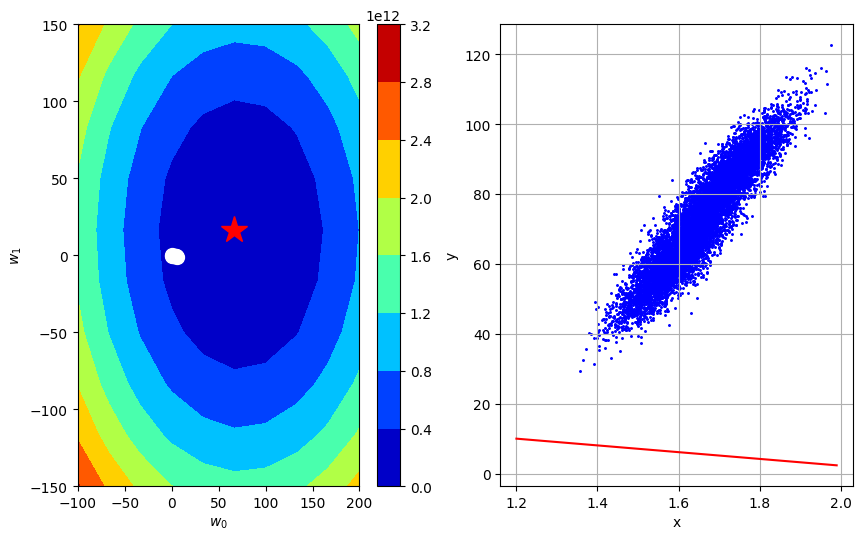

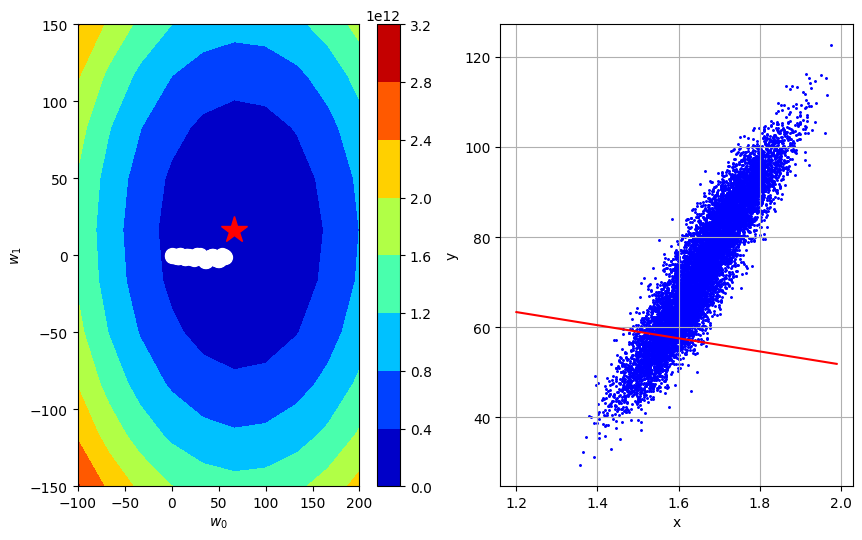

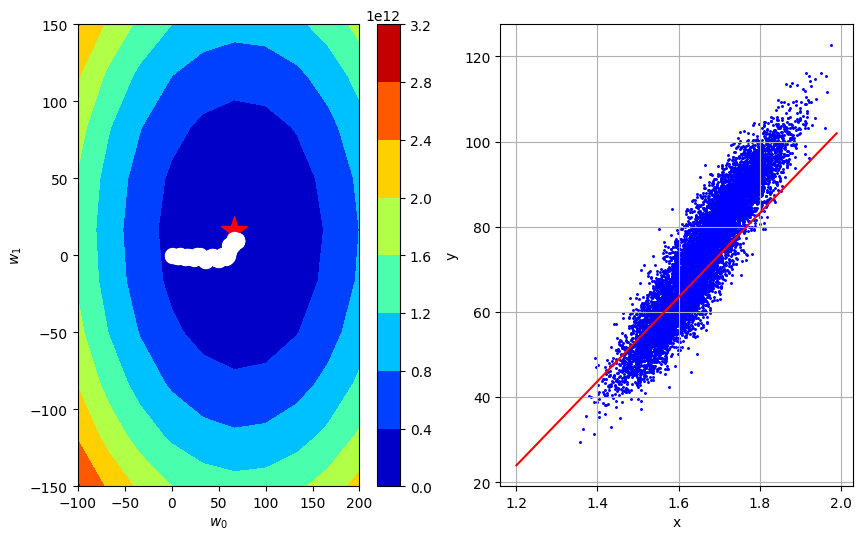

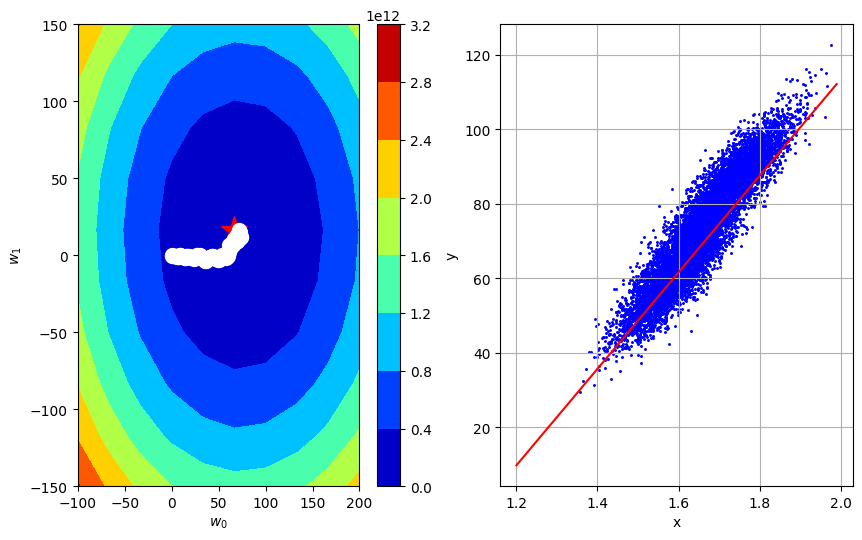

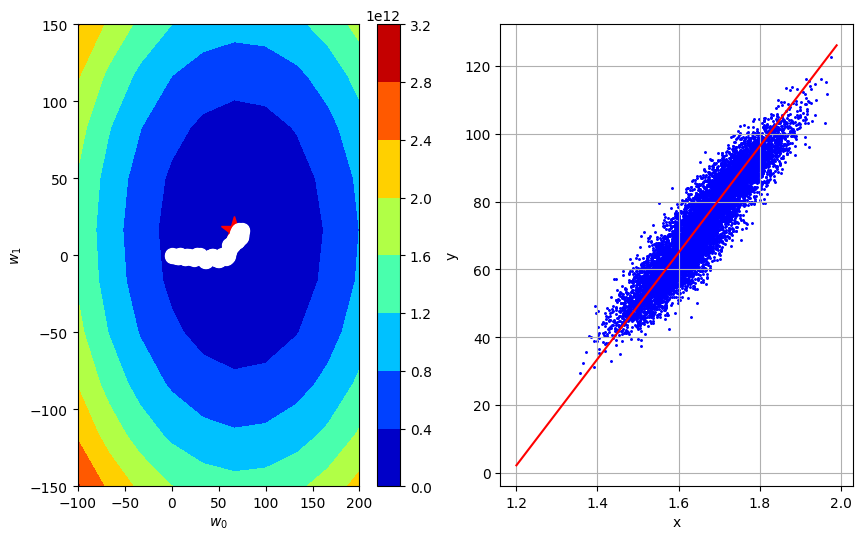

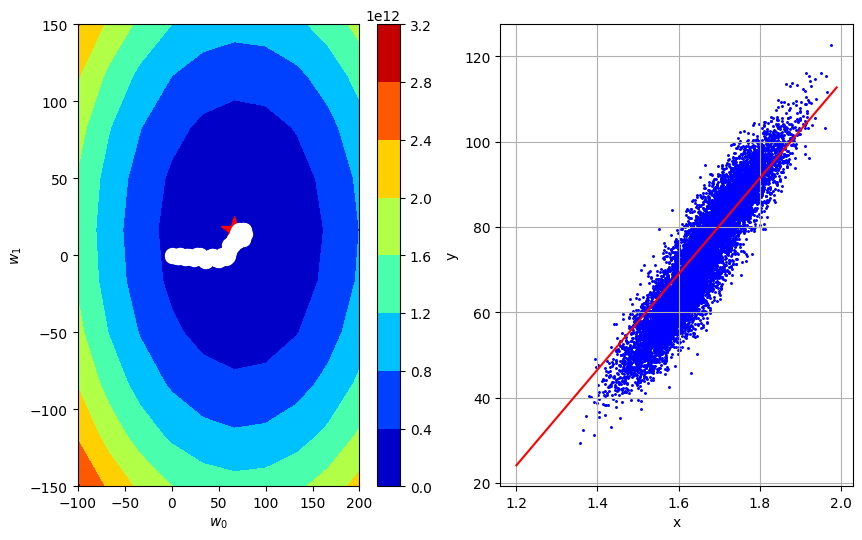

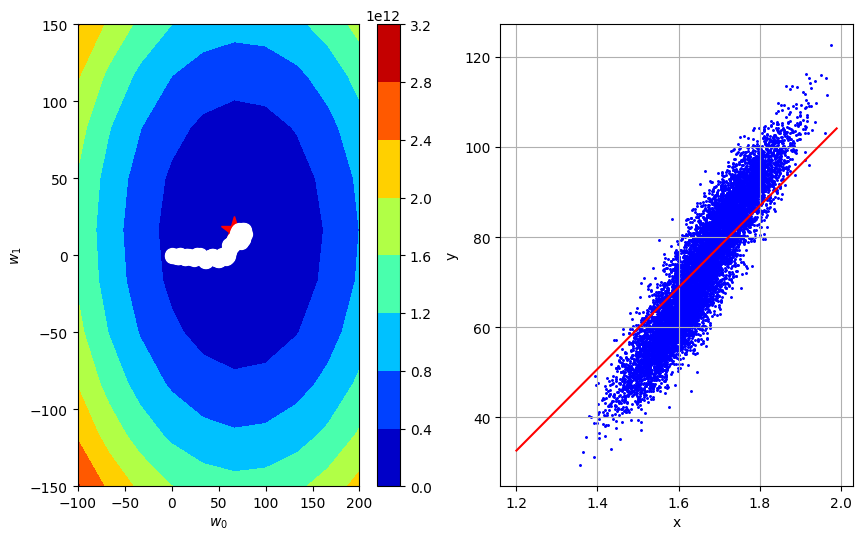

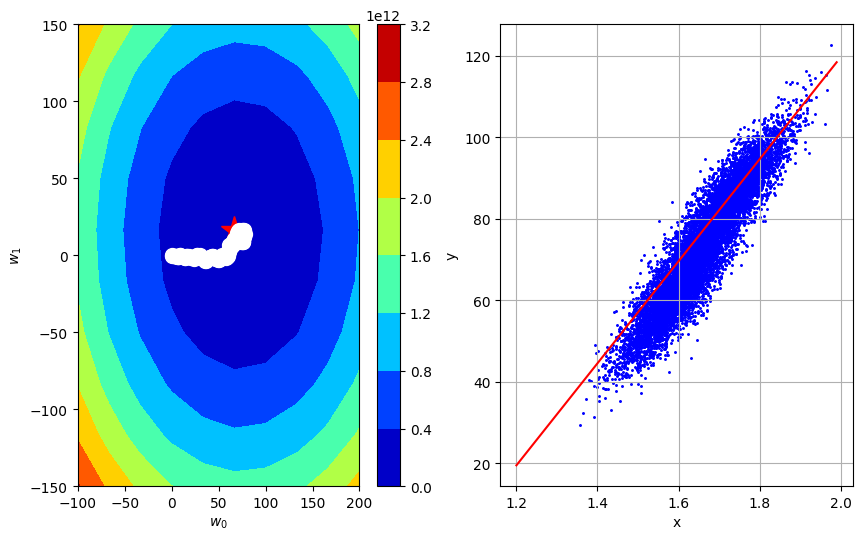

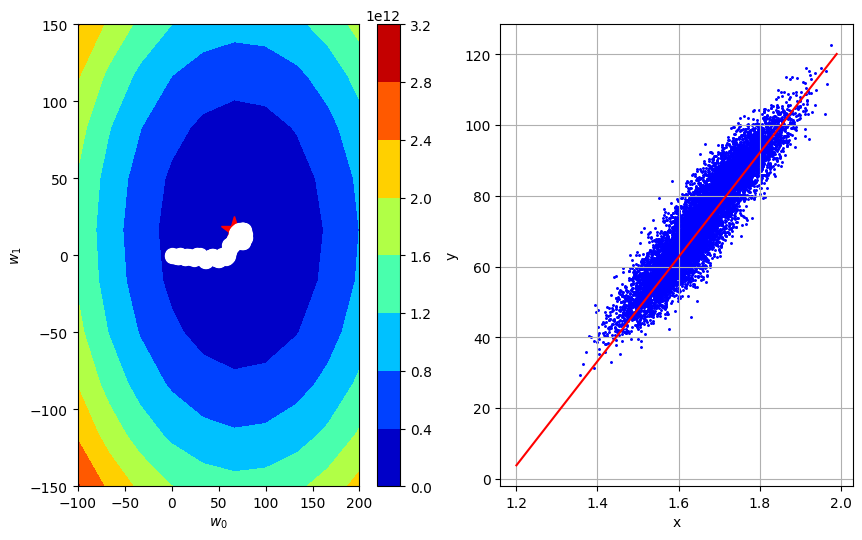

In [55]:
from ipywidgets import IntSlider, interact


def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        subsgd_losses,
        subsgd_ws,
        grid_losses,
        grid_w0,
        grid_w1,
        mean_x,
        std_x,
        height,
        weight,
        n_iter,
    )
    fig.set_size_inches(10.0, 6.0)


interact(plot_figure, n_iter=IntSlider(min=1, max=len(subsgd_ws)))